In [2]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [3]:
fldr="UTKFace"

In [4]:
import os
files=os.listdir(fldr)

In [11]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
UTKFace/10_0_0_20170103200329407.jpg.chip.jpg
UTKFace/10_0_0_

IndexError: list index out of range

# create a list of Age and Gender from dataset

In [8]:
ages = []
genders = []

for file in files:
    parts = file.split('_')
    if len(parts) != 2:
        continue  # Skip files that don't follow the naming convention

    try:
        age = int(parts[0])
        gender = int(parts[1])
    except ValueError:
        continue  # Skip files with invalid age or gender values

    ages.append(age)
    genders.append(gender)


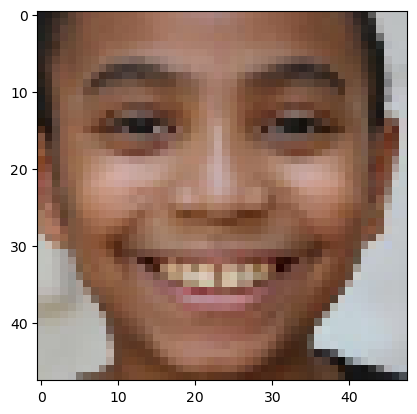

In [9]:
plt.imshow(images[87])

In [10]:
print(ages[87])

IndexError: list index out of range

In [12]:
print(genders[87])

0


In [13]:
images_f = np.array(images)
ages_f = np.array(ages)
genders_f = np.array(genders)

In [14]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

##Finding the numbers of elements in the dataset

In [15]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12391 11317]


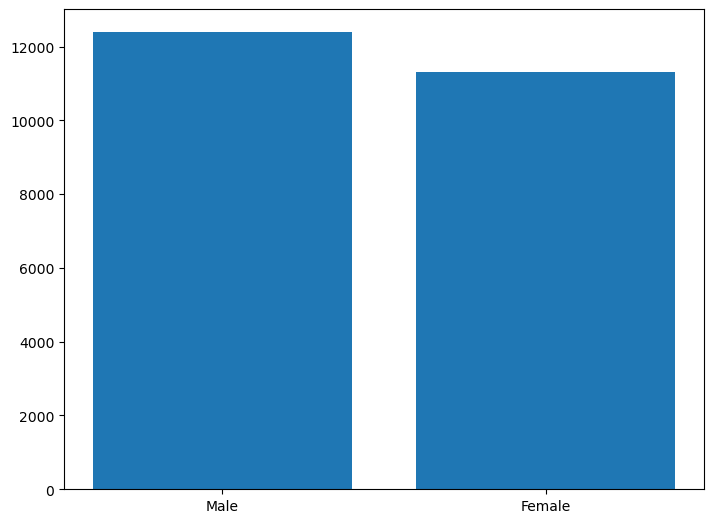

In [16]:
# Plotting the samples
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
gender = ["Male", "Female"]
values=[12391,11317]
ax.bar(gender, values)
plt.show()

Finding the numbers of samples in each age

In [17]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


Converting the samples to lists

In [18]:
val = values.tolist()
cnt = counts.tolist()

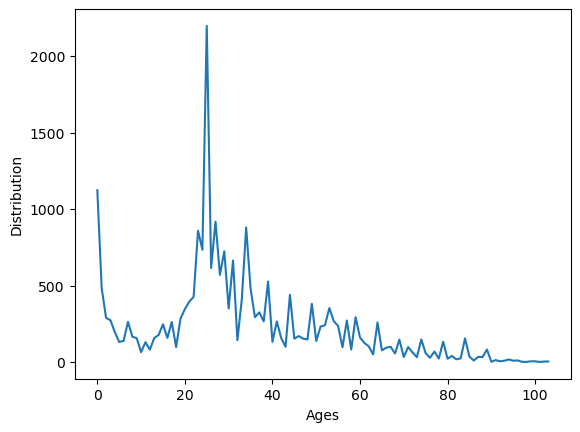

In [19]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

Defining labels for output

In [20]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

Creating another list of images from existing one

In [21]:
images_f_2=images_f/255

In [22]:
images_f_2.shape

(23708, 48, 48, 3)

In [23]:
labels_f=np.array(labels)

Splitting the dataset into test and train 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
# Splitting the dataset into train and test
X_train, X_test, Y_train, Y_test = train_test_split(images_f_2, labels_f, test_size=0.25)
Y_train[0:5]

array([[88,  0],
       [34,  0],
       [35,  1],
       [18,  0],
       [65,  0]])

Splitting the Y_test and y train further for better understanding

In [26]:
Y_train_2 = [Y_train[:, 1], Y_train[:, 0]]
Y_test_2 = [Y_test[:, 1], Y_test[:, 0]]

In [27]:
Y_train_2[0][0:5]

array([0, 0, 1, 0, 0])

Defining the model

In [28]:

def Convolution(input_tensor, filters):
    x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1), kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x = Activation('relu')(x)
    return x

In [29]:
def build_model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5=Convolution(maxp_4,512)
    maxp_5=MaxPooling2D(pool_size=(2,2))(conv_5)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=['binary_crossentropy', 'mae'], optimizer='Adam', metrics=['accuracy'])
    return model

In [ ]:
def build_model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten = Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1 = Dropout(0.2)(dense_1)
    drop_2 = Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=['accuracy'])
    return model
    
    
    

In [30]:
model = build_model((48, 48, 3))

In [31]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
fle_s="Age_sex_Detection.h5"
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,Early_stop]

In [37]:
History = model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=250, callbacks=callback_list)


Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 15.6900 - sex_out_loss: 0.6863 - age_out_loss: 14.8236 - sex_out_accuracy: 0.5419 - age_out_accuracy: 0.0477
Epoch 1: val_loss improved from inf to 17.35947, saving model to Age_sex_Detection.h5
278/278 [==============================] - 55s 199ms/step - loss: 15.6900 - sex_out_loss: 0.6863 - age_out_loss: 14.8236 - sex_out_accuracy: 0.5419 - age_out_accuracy: 0.0477 - val_loss: 17.3595 - val_sex_out_loss: 0.6598 - val_age_out_loss: 16.5073 - val_sex_out_accuracy: 0.6777 - val_age_out_accuracy: 0.0464
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 12.8210 - sex_out_loss: 0.6031 - age_out_loss: 11.9787 - sex_out_accuracy: 0.6650 - age_out_accuracy: 0.0458
Epoch 2: val_loss improved from 17.35947 to 12.94920, saving model to Age_sex_Detection.h5
278/278 [==============================] - 64s 231ms/step - loss: 12.8210 - sex_out_loss: 0.6031 - age_out_loss: 11.9787 - sex_out_accuracy: 0.6650 - a

Evaluate the model

In [39]:
# Evaluate the model
model.evaluate(X_test, [Y_test[:, 1], Y_test[:, 0]]) 

186/186 [==============================] - 3s 18ms/step - loss: 7.4921 - sex_out_loss: 0.2437 - age_out_loss: 6.4810 - sex_out_accuracy: 0.8920 - age_out_accuracy: 0.0464


[7.492068767547607,
 0.24367421865463257,
 6.481003761291504,
 0.8920195698738098,
 0.04639783874154091]

In [40]:
pred = model.predict(X_test)

186/186 [==============================] - 4s 18ms/step


In [41]:
pred[1]

array([[50.557747],
       [25.87485 ],
       [26.502666],
       ...,
       [23.62613 ],
       [50.863506],
       [42.249714]], dtype=float32)

Plotting Loss

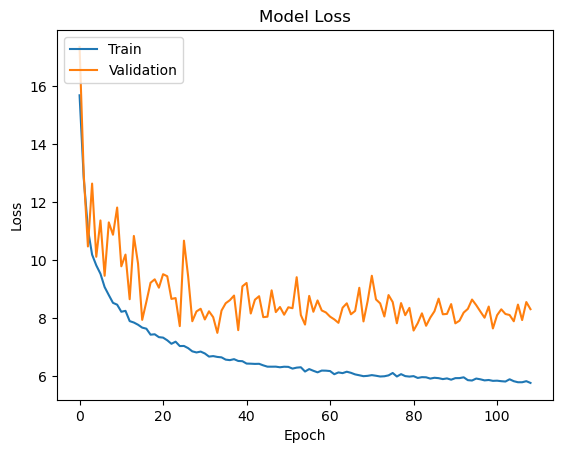

In [42]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

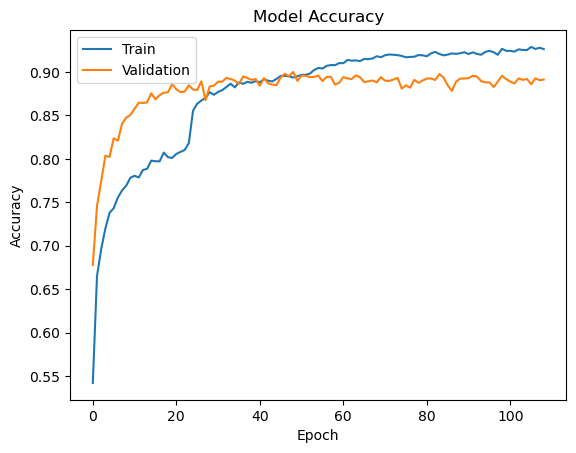

In [43]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

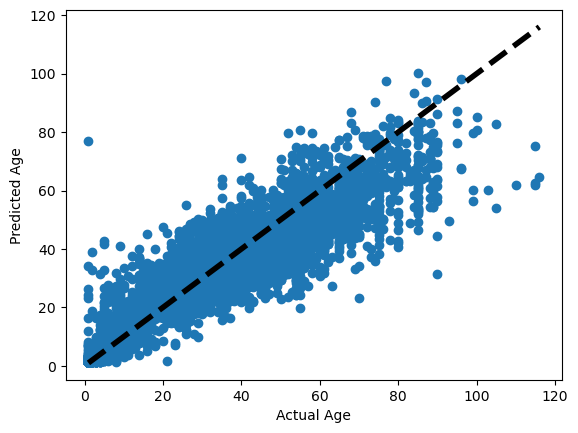

In [44]:
fig, ax = plt.subplots()
ax.scatter(Y_test[:, 0], pred[1])
ax.plot([Y_test[:, 0].min(), Y_test[:, 0].max()], [Y_test[:, 0].min(), Y_test[:, 0].max()], 'k--', lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [45]:
i=0
Pred_1=[]
while(i<len(pred[0])):
    Pred_1.append(int(np.round(pred[0][i])))
    i=i+1

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
report=classification_report(Y_test_2[0],Pred_1)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3073
           1       0.90      0.87      0.89      2854

    accuracy                           0.89      5927
   macro avg       0.89      0.89      0.89      5927
weighted avg       0.89      0.89      0.89      5927



In [48]:
results=confusion_matrix(Y_test_2[0],Pred_1)

<Axes: >

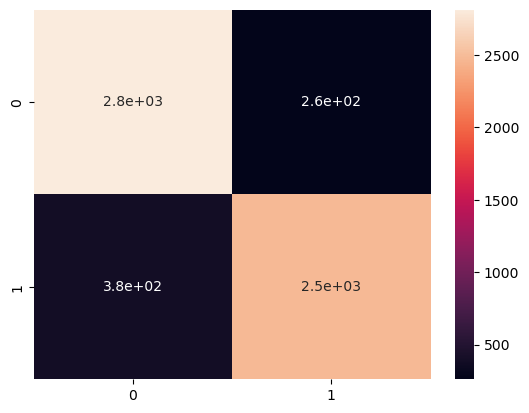

In [49]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [50]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age is " + str(age))
    print("Predicted Gender is " + sex_f[sex])

1/1 [==============================] - 0s 22ms/step
Predicted Age is 51
Predicted Gender is Female


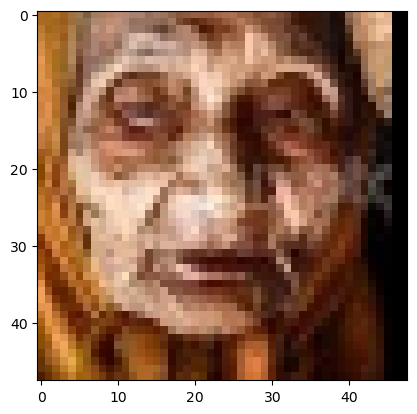

In [58]:
test_image(10,images_f,images_f_2,model)